In [1]:
# You only need to run this once per machine
!pip install pandas
!pip install -q -U bitsandbytes
!pip install -q -U git+https://github.com/huggingface/transformers.git
!pip install -q -U git+https://github.com/huggingface/peft.git
!pip install -q -U git+https://github.com/huggingface/accelerate.git
!pip install -q -U datasets scipy ipywidgets matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [2]:
prev_examples = ['prompt\n-----------\nThis book was written by George Orwell in 1949.\n-----------\n\nresponse\n-----------\n{\n  "author": "George Orwell",\n  "date": "1949"\n}\n-----------', 'prompt\n-----------\nIm Jahr 1818 veröffentlichte Mary Shelley ihren Roman "Frankenstein".\n-----------\n\nresponse\n-----------\n{\n  "author": "Mary Shelley",\n  "date": "1818"\n}\n-----------', 'prompt\n-----------\nIn a letter dated May 10, 1933, Albert Einstein wrote to his friend about his latest discoveries.\n-----------\n\nresponse\n-----------\n{\n  "author": "Albert Einstein",\n  "date": "May 10, 1933"\n}\n-----------', 'prompt\n-----------\nIm Jahr 1920 veröffentlichte Franz Kafka "Das Schloss", eines seiner bekanntesten Werke.\n-----------\n\nresponse\n-----------\n{\n  "author": "Franz Kafka",\n  "date": "1920"\n}\n-----------', 'prompt\n-----------\nThe famous novel "To Kill a Mockingbird" was published by Harper Lee on July 11, 1960.\n-----------\n\nresponse\n-----------\n{\n  "author": "Harper Lee",\n  "date": "July 11, 1960"\n}\n-----------', 'prompt\n-----------\nAm 28. September 1909 wurde Thomas Manns Roman "Buddenbrooks" veröffentlicht.\n-----------\n\nresponse\n-----------\n{\n  "author": "Thomas Mann",\n  "date": "28. September 1909"\n}\n-----------', 'prompt\n-----------\nOn September 1, 1851, Herman Melville published his masterpiece, "Moby-Dick".\n-----------\n\nresponse\n-----------\n{\n  "author": "Herman Melville",\n  "date": "September 1, 1851"\n}\n-----------', 'prompt\n-----------\nIm Jahr 1774 veröffentlichte Johann Wolfgang von Goethe seinen Roman "Die Leiden des jungen Werthers".\n-----------\n\nresponse\n-----------\n{\n  "author": "Johann Wolfgang von Goethe",\n  "date": "1774"\n}\n-----------', 'prompt\n-----------\nThe first edition of "Pride and Prejudice" by Jane Austen was published on January 28, 1813.\n-----------\n\nresponse\n-----------\n{\n  "author": "Jane Austen",\n  "date": "January 28, 1813"\n}\n-----------', 'prompt\n-----------\nAm 24. Februar 1920 wurde Adolf Hitlers Buch "Mein Kampf" veröffentlicht.\n-----------\n\nresponse\n-----------\n{\n  "author": "Adolf Hitler",\n  "date": "24. Februar 1920"\n}\n-----------', 'prompt\n-----------\nOn April 14, 1939, John Steinbeck published his novel "The Grapes of Wrath".\n-----------\n\nresponse\n-----------\n{\n  "author": "John Steinbeck",\n  "date": "April 14, 1939"\n}\n-----------', 'prompt\n-----------\nIn 1949, George Orwell released his dystopian novel "1984".\n-----------\n\nresponse\n-----------\n{\n  "author": "George Orwell",\n  "date": "1949"\n}\n-----------', 'prompt\n-----------\nAm 10. November 1782 veröffentlichte Wolfgang Amadeus Mozart seine Sonate Nr. 16.\n-----------\n\nresponse\n-----------\n{\n  "author": "Wolfgang Amadeus Mozart",\n  "date": "10. November 1782"\n}\n-----------', 'prompt\n-----------\nAm 10. Dezember 1865 wurde Lewis Carrolls "Alice im Wunderland" veröffentlicht.\n-----------\n\nresponse\n-----------\n{\n  "author": "Lewis Carroll",\n  "date": "10. Dezember 1865"\n}\n-----------', 'prompt\n-----------\nThe book "1984" was written by George Orwell in 1949.\n-----------\nresponse\n-----------\n{\n  "author": "George Orwell",\n  "date": "1949"\n}\n-----------', 'prompt\n-----------\nIn 1922, T.S. Eliot published his famous poem "The Waste Land".\n-----------\nresponse\n-----------\n{\n  "author": "T.S. Eliot",\n  "date": "1922"\n}\n-----------', 'prompt\n-----------\n"Die Verwandlung" ist eine Novelle von Franz Kafka, die im Jahr 1915 veröffentlicht wurde.\n-----------\nresponse\n-----------\n{\n  "author": "Franz Kafka",\n  "date": "1915"\n}\n-----------', 'prompt\n-----------\nIm Jahr 1818 veröffentlichte Mary Shelley ihren Roman "Frankenstein".\n-----------\nresponse\n-----------\n{\n  "author": "Mary Shelley",\n  "date": "1818"\n}\n-----------', 'prompt\n-----------\n"Animal Farm" is a novel by George Orwell, published in 1945.\n-----------\nresponse\n-----------\n{\n  "author": "George Orwell",\n  "date": "1945"\n}\n-----------', 'prompt\n-----------\nErnest Hemingway wrote "The Old Man and the Sea" in 1952.\n-----------\nresponse\n-----------\n{\n  "author": "Ernest Hemingway",\n  "date": "1952"\n}\n-----------', 'prompt\n-----------\n"Faust" ist ein Drama von Johann Wolfgang von Goethe, das im Jahr 1808 veröffentlicht wurde.\n-----------\nresponse\n-----------\n{\n  "author": "Johann Wolfgang von Goethe",\n  "date": "1808"\n}\n-----------', 'prompt\n-----------\nIn 1851, Herman Melville published his novel "Moby-Dick".\n-----------\nresponse\n-----------\n{\n  "author": "Herman Melville",\n  "date": "1851"\n}\n-----------', 'prompt\n-----------\n"Die Leiden des jungen Werthers" ist ein Roman von Johann Wolfgang von Goethe, der im Jahr 1774 veröffentlicht wurde.\n-----------\nresponse\n-----------\n{\n  "author": "Johann Wolfgang von Goethe",\n  "date": "1774"\n}\n-----------', 'prompt\n-----------\nIn 1960, Harper Lee published her novel "To Kill a Mockingbird".\n-----------\nresponse\n-----------\n{\n  "author": "Harper Lee",\n  "date": "1960"\n}\n-----------', 'prompt\n-----------\n"Der Prozess" ist ein Roman von Franz Kafka, der posthum im Jahr 1925 veröffentlicht wurde.\n-----------\nresponse\n-----------\n{\n  "author": "Franz Kafka",\n  "date": "1925"\n}\n-----------', 'prompt\n-----------\nThis is a text written by John Doe on 12th March 2021.\n-----------\n\nresponse\n-----------\n{\n  "author": "John Doe",\n  "date": "12th March 2021"\n}\n-----------', 'prompt\n-----------\nAm 15. April 2020 wurde dieser Text von Maria Schmidt verfasst.\n-----------\n\nresponse\n-----------\n{\n  "author": "Maria Schmidt",\n  "date": "15. April 2020"\n}\n-----------', 'prompt\n-----------\nOn 1st January 2022, a text was written by Emily Johnson.\n-----------\n\nresponse\n-----------\n{\n  "author": "Emily Johnson",\n  "date": "1st January 2022"\n}\n-----------', 'prompt\n-----------\nDieser Text wurde von Thomas Müller am 24. Dezember 2019 geschrieben.\n-----------\n\nresponse\n-----------\n{\n  "author": "Thomas Müller",\n  "date": "24. Dezember 2019"\n}\n-----------', 'prompt\n-----------\nThe author of this text is Sarah Brown and it was written on 30th June 2021.\n-----------\n\nresponse\n-----------\n{\n  "author": "Sarah Brown",\n  "date": "30th June 2021"\n}\n-----------', 'prompt\n-----------\nAm 5. Mai 2018 hat Anna Schneider diesen Text verfasst.\n-----------\n\nresponse\n-----------\n{\n  "author": "Anna Schneider",\n  "date": "5. Mai 2018"\n}\n-----------', 'prompt\n-----------\nThis text was written by Robert Smith on the 4th of July, 2020.\n-----------\n\nresponse\n-----------\n{\n  "author": "Robert Smith",\n  "date": "4th of July, 2020"\n}\n-----------', 'prompt\n-----------\nDieser Text wurde von Julia Fischer am 31. Oktober 2017 verfasst.\n-----------\n\nresponse\n-----------\n{\n  "author": "Julia Fischer",\n  "date": "31. Oktober 2017"\n}\n-----------', 'prompt\n-----------\nOn 29th February 2020, this text was authored by Michael Davis.\n-----------\n\nresponse\n-----------\n{\n  "author": "Michael Davis",\n  "date": "29th February 2020"\n}\n-----------', 'prompt\n-----------\nAm 14. Februar 2019 wurde dieser Text von Daniel Meyer geschrieben.\n-----------\n\nresponse\n-----------\n{\n  "author": "Daniel Meyer",\n  "date": "14. Februar 2019"\n}\n-----------', 'prompt\n-----------\nThis text, written by Lisa Taylor, was published on 10th October 2021.\n-----------\n\nresponse\n-----------\n{\n  "author": "Lisa Taylor",\n  "date": "10th October 2021"\n}\n-----------', 'prompt\n-----------\nAm 2. Februar 2019 hat David Becker diesen Text geschrieben.\n-----------\n\nresponse\n-----------\n{\n  "author": "David Becker",\n  "date": "2. Februar 2019"\n}\n-----------', 'prompt\n-----------\nAm 11. November 2018 wurde dieser Text von Anna Schneider verfasst.\n-----------\n\nresponse\n-----------\n{\n  "author": "Anna Schneider",\n  "date": "11. November 2018"\n}\n-----------', 'prompt\n-----------\nOn 1st January 2022, this text was authored by Richard Johnson.\n-----------\n\nresponse\n-----------\n{\n  "author": "Richard Johnson",\n  "date": "1st January 2022"\n}\n-----------', 'prompt\n-----------\nDieser Text wurde von Maria Schmidt am 15. August 2020 verfasst.\n-----------\n\nresponse\n-----------\n{\n  "author": "Maria Schmidt",\n  "date": "15. August 2020"\n}\n-----------', 'prompt\n-----------\nDieser Text wurde von Thomas Müller am 25. Dezember 2019 verfasst.\n-----------\n\nresponse\n-----------\n{\n  "author": "Thomas Müller",\n  "date": "25. Dezember 2019"\n}\n-----------', 'prompt\n-----------\nThis text was written by John Doe on 12th of March, 2020.\n-----------\n\nresponse\n-----------\n{\n  "author": "John Doe",\n  "date": "12th of March, 2020"\n}\n-----------', 'prompt\n-----------\nAm 25. Dezember 1999 schrieb Angela Merkel diesen Text.\n-----------\n\nresponse\n-----------\n{\n  "author": "Angela Merkel",\n  "date": "25. Dezember 1999"\n}\n-----------', 'prompt\n-----------\nOn the 5th of July, 2005, a document was drafted by Albert Einstein.\n-----------\n\nresponse\n-----------\n{\n  "author": "Albert Einstein",\n  "date": "5th of July, 2005"\n}\n-----------', 'prompt\n-----------\nDieser Artikel wurde von Johann Wolfgang von Goethe am 22. April 1782 verfasst.\n-----------\n\nresponse\n-----------\n{\n  "author": "Johann Wolfgang von Goethe",\n  "date": "22. April 1782"\n}\n-----------', 'prompt\n-----------\nThe book "The Great Gatsby" was written by F. Scott Fitzgerald and published on April 10, 1925.\n-----------\n\nresponse\n-----------\n{\n  "author": "F. Scott Fitzgerald",\n  "date": "April 10, 1925"\n}\n-----------', 'prompt\n-----------\nAm 15. August 1947 veröffentlichte Mahatma Gandhi einen Brief.\n-----------\n\nresponse\n-----------\n{\n  "author": "Mahatma Gandhi",\n  "date": "15. August 1947"\n}\n-----------', 'prompt\n-----------\nThe article titled "The Theory of Relativity" was written by Albert Einstein and published on November 25, 1915.\n-----------\n\nresponse\n-----------\n{\n  "author": "Albert Einstein",\n  "date": "November 25, 1915"\n}\n-----------', 'prompt\n-----------\nDieser Bericht wurde von Angela Merkel am 3. Oktober 2000 verfasst.\n-----------\n\nresponse\n-----------\n{\n  "author": "Angela Merkel",\n  "date": "3. Oktober 2000"\n}\n-----------', 'prompt\n-----------\nOn the 30th of September, 2010, a research paper was published by Stephen Hawking.\n-----------\n\nresponse\n-----------\n{\n  "author": "Stephen Hawking",\n  "date": "30th of September, 2010"\n}\n-----------', 'prompt\n-----------\nAm 1. Januar 2001 schrieb Thomas Mann diesen Roman.\n-----------\n\nresponse\n-----------\n{\n  "author": "Thomas Mann",\n  "date": "1. Januar 2001"\n}\n-----------', 'prompt\n-----------\nThe poem "The Raven" was written by Edgar Allan Poe and published on January 29, 1845.\n-----------\n\nresponse\n-----------\n{\n  "author": "Edgar Allan Poe",\n  "date": "January 29, 1845"\n}\n-----------', 'prompt\n-----------\nOn the 21st of June, 1987, a novel was published by J.K. Rowling.\n-----------\n\nresponse\n-----------\n{\n  "author": "J.K. Rowling",\n  "date": "21st of June, 1987"\n}\n-----------', 'prompt\n-----------\nThe scientific paper titled "Quantum Mechanics" was written by Max Planck and published on December 14, 1900.\n-----------\n\nresponse\n-----------\n{\n  "author": "Max Planck",\n  "date": "December 14, 1900"\n}\n-----------', 'prompt\n-----------\nAm 3. März 2003 veröffentlichte Stephen King diesen Roman.\n-----------\n\nresponse\n-----------\n{\n  "author": "Stephen King",\n  "date": "3. März 2003"\n}\n-----------', 'prompt\n-----------\nThis article was written by Charles Dickens on the 30th of June, 1865.\n-----------\n\nresponse\n-----------\n{\n  "author": "Charles Dickens",\n  "date": "30th of June, 1865"\n}\n-----------', 'prompt\n-----------\nThe book "To Kill a Mockingbird" was written by Harper Lee and published on July 11, 1960.\n-----------\n\nresponse\n-----------\n{\n  "author": "Harper Lee",\n  "date": "July 11, 1960"\n}\n-----------', 'prompt\n-----------\nThis text was written by John Doe on 12th of March, 2020.\n-----------\n\nresponse\n-----------\n{\n  "author": "John Doe",\n  "date": "12th of March, 2020"\n}\n-----------', 'prompt\n-----------\nAm 25. Dezember 1999 schrieb Angela Merkel diesen Text.\n-----------\n\nresponse\n-----------\n{\n  "author": "Angela Merkel",\n  "date": "25. Dezember 1999"\n}\n-----------', 'prompt\n-----------\nOn the 5th of July, 2005, a document was drafted by Albert Einstein.\n-----------\n\nresponse\n-----------\n{\n  "author": "Albert Einstein",\n  "date": "5th of July, 2005"\n}\n-----------', 'prompt\n-----------\nDieser Artikel wurde von Johann Wolfgang von Goethe am 22. April 1782 verfasst.\n-----------\n\nresponse\n-----------\n{\n  "author": "Johann Wolfgang von Goethe",\n  "date": "22. April 1782"\n}\n-----------', 'prompt\n-----------\nThe book "The Great Gatsby" was written by F. Scott Fitzgerald and published on April 10, 1925.\n-----------\n\nresponse\n-----------\n{\n  "author": "F. Scott Fitzgerald",\n  "date": "April 10, 1925"\n}\n-----------', 'prompt\n-----------\nAm 15. August 1947 veröffentlichte Mahatma Gandhi einen Brief.\n-----------\n\nresponse\n-----------\n{\n  "author": "Mahatma Gandhi",\n  "date": "15. August 1947"\n}\n-----------', 'prompt\n-----------\nThe article titled "The Theory of Relativity" was written by Albert Einstein and published on November 25, 1915.\n-----------\n\nresponse\n-----------\n{\n  "author": "Albert Einstein",\n  "date": "November 25, 1915"\n}\n-----------', 'prompt\n-----------\nDieser Bericht wurde von Angela Merkel am 3. Oktober 2000 verfasst.\n-----------\n\nresponse\n-----------\n{\n  "author": "Angela Merkel",\n  "date": "3. Oktober 2000"\n}\n-----------', 'prompt\n-----------\nOn the 30th of September, 2010, a research paper was published by Stephen Hawking.\n-----------\n\nresponse\n-----------\n{\n  "author": "Stephen Hawking",\n  "date": "30th of September, 2010"\n}\n-----------', 'prompt\n-----------\nAm 1. Januar 2001 schrieb Thomas Mann diesen Roman.\n-----------\n\nresponse\n-----------\n{\n  "author": "Thomas Mann",\n  "date": "1. Januar 2001"\n}\n-----------', 'prompt\n-----------\nThe poem "The Raven" was written by Edgar Allan Poe and published on January 29, 1845.\n-----------\n\nresponse\n-----------\n{\n  "author": "Edgar Allan Poe",\n  "date": "January 29, 1845"\n}\n-----------', 'prompt\n-----------\nOn the 21st of June, 1987, a novel was published by J.K. Rowling.\n-----------\n\nresponse\n-----------\n{\n  "author": "J.K. Rowling",\n  "date": "21st of June, 1987"\n}\n-----------', 'prompt\n-----------\nThe scientific paper titled "Quantum Mechanics" was written by Max Planck and published on December 14, 1900.\n-----------\n\nresponse\n-----------\n{\n  "author": "Max Planck",\n  "date": "December 14, 1900"\n}\n-----------', 'prompt\n-----------\nAm 3. März 2003 veröffentlichte Stephen King diesen Roman.\n-----------\n\nresponse\n-----------\n{\n  "author": "Stephen King",\n  "date": "3. März 2003"\n}\n-----------', 'prompt\n-----------\nThis article was written by Charles Dickens on the 30th of June, 1865.\n-----------\n\nresponse\n-----------\n{\n  "author": "Charles Dickens",\n  "date": "30th of June, 1865"\n}\n-----------', 'prompt\n-----------\nThe book "To Kill a Mockingbird" was written by Harper Lee and published on July 11, 1960.\n-----------\n\nresponse\n-----------\n{\n  "author": "Harper Lee",\n  "date": "July 11, 1960"\n}\n-----------', 'prompt\n-----------\nOn the 15th of August, 1947, a declaration was made by Jawaharlal Nehru.\n-----------\n\nresponse\n-----------\n{\n  "author": "Jawaharlal Nehru",\n  "date": "15th of August, 1947"\n}\n-----------', 'prompt\n-----------\nAm 10. Oktober 2000 veröffentlichte J.K. Rowling diesen Roman.\n-----------\n\nresponse\n-----------\n{\n  "author": "J.K. Rowling",\n  "date": "10. Oktober 2000"\n}\n-----------', 'prompt\n-----------\nThe book "1984" was written by George Orwell and published on June 8, 1949.\n-----------\n\nresponse\n-----------\n{\n  "author": "George Orwell",\n  "date": "June 8, 1949"\n}\n-----------', 'prompt\n-----------\nOn the 31st of October, 2000, a report was written by Tony Blair.\n-----------\n\nresponse\n-----------\n{\n  "author": "Tony Blair",\n  "date": "31st of October, 2000"\n}\n-----------', 'prompt\n-----------\nThe novel "Pride and Prejudice" was written by Jane Austen and published on January 28, 1813.\n-----------\n\nresponse\n-----------\n{\n  "author": "Jane Austen",\n  "date": "January 28, 1813"\n}\n-----------', 'prompt\n-----------\nAm 25. Dezember 1995 veröffentlichte Stephen King dieses Buch.\n-----------\n\nresponse\n-----------\n{\n  "author": "Stephen King",\n  "date": "25. Dezember 1995"\n}\n-----------', 'prompt\n-----------\nOn the 1st of January, 2001, a research paper was published by Jane Doe.\n-----------\n\nresponse\n-----------\n{\n  "author": "Jane Doe",\n  "date": "1st of January, 2001"\n}\n-----------', 'prompt\n-----------\nAm 1. Januar 2000 schrieb Albert Einstein diesen Brief.\n-----------\n\nresponse\n-----------\n{\n  "author": "Albert Einstein",\n  "date": "1. Januar 2000"\n}\n-----------', 'prompt\n-----------\nAm 15. Februar 1999 veröffentlichte Johann Wolfgang von Goethe dieses Gedicht.\n-----------\n\nresponse\n-----------\n{\n  "author": "Johann Wolfgang von Goethe",\n  "date": "15. Februar 1999"\n}\n-----------', 'prompt\n-----------\nOn the 7th of July, 2007, a blog post was published by Mark Zuckerberg.\n-----------\n\nresponse\n-----------\n{\n  "author": "Mark Zuckerberg",\n  "date": "7th of July, 2007"\n}\n-----------', 'prompt\n-----------\nOn the 20th of May, 2020, a scientific paper was published by Stephen Hawking.\n-----------\n\nresponse\n-----------\n{\n  "author": "Stephen Hawking",\n  "date": "20th of May, 2020"\n}\n-----------', 'prompt\n-----------\nThe book "To Kill a Mockingbird" was written by Harper Lee and published on July 11, 1960.\n-----------\n\nresponse\n-----------\n{\n  "author": "Harper Lee",\n  "date": "July 11, 1960"\n}\n-----------', 'prompt\n-----------\nThis is a letter from John Smith on 12th March 2018.\n-----------\n\nresponse\n-----------\n{\n  "author": "John Smith",\n  "date": "12th March 2018"\n}\n-----------', 'prompt\n-----------\nAm 20. April 2001 schrieb Angela Merkel einen Brief.\n-----------\n\nresponse\n-----------\n{\n  "author": "Angela Merkel",\n  "date": "20. April 2001"\n}\n-----------', 'prompt\n-----------\nThis is an article written by Charles Dickens on 7th February 1812.\n-----------\n\nresponse\n-----------\n{\n  "author": "Charles Dickens",\n  "date": "7th February 1812"\n}\n-----------', 'prompt\n-----------\nAm 9. November 1989 gab Helmut Kohl eine Rede.\n-----------\n\nresponse\n-----------\n{\n  "author": "Helmut Kohl",\n  "date": "9. November 1989"\n}\n-----------', 'prompt\n-----------\nA poem was written by Emily Dickinson on 10th December 1830.\n-----------\n\nresponse\n-----------\n{\n  "author": "Emily Dickinson",\n  "date": "10th December 1830"\n}\n-----------', 'prompt\n-----------\nAm 1. Mai 1960 veröffentlichte Johann Wolfgang von Goethe ein Gedicht.\n-----------\n\nresponse\n-----------\n{\n  "author": "Johann Wolfgang von Goethe",\n  "date": "1. Mai 1960"\n}\n-----------', 'prompt\n-----------\nThis is a report by Albert Einstein on 14th March 1879.\n-----------\n\nresponse\n-----------\n{\n  "author": "Albert Einstein",\n  "date": "14th March 1879"\n}\n-----------', 'prompt\n-----------\nAm 12. Februar 1809 schrieb Charles Darwin einen Artikel.\n-----------\n\nresponse\n-----------\n{\n  "author": "Charles Darwin",\n  "date": "12. Februar 1809"\n}\n-----------', 'prompt\n-----------\nThe text "The Catcher in the Rye" was written by J.D. Salinger in 1951.\n-----------\n\nresponse\n-----------\n{\n  "author": "J.D. Salinger",\n  "date": "1951"\n}\n-----------', 'prompt\n-----------\nDas Buch "Die Verwandlung" wurde 1915 von Franz Kafka geschrieben.\n-----------\n\nresponse\n-----------\n{\n  "author": "Franz Kafka",\n  "date": "1915"\n}\n-----------', 'prompt\n-----------\nIn 1984, George Orwell published his famous novel "1984".\n-----------\n\nresponse\n-----------\n{\n  "author": "George Orwell",\n  "date": "1984"\n}\n-----------', 'prompt\n-----------\n"Faust", ein Drama von Johann Wolfgang von Goethe, wurde 1808 veröffentlicht.\n-----------\n\nresponse\n-----------\n{\n  "author": "Johann Wolfgang von Goethe",\n  "date": "1808"\n}\n-----------', 'prompt\n-----------\nThe book "Pride and Prejudice" was written by Jane Austen and published in 1813.\n-----------\n\nresponse\n-----------\n{\n  "author": "Jane Austen",\n  "date": "1813"\n}\n-----------', 'prompt\n-----------\nIm Jahr 1925 wurde der Roman "Der große Gatsby" von F. Scott Fitzgerald veröffentlicht.\n-----------\n\nresponse\n-----------\n{\n  "author": "F. Scott Fitzgerald",\n  "date": "1925"\n}\n-----------', 'prompt\n-----------\n"The Old Man and the Sea", a novel by Ernest Hemingway, was published in 1952.\n-----------\n\nresponse\n-----------\n{\n  "author": "Ernest Hemingway",\n  "date": "1952"\n}\n-----------', 'prompt\n-----------\n"Der Prozess", ein Roman von Franz Kafka, wurde posthum im Jahr 1925 veröffentlicht.\n-----------\n\nresponse\n-----------\n{\n  "author": "Franz Kafka",\n  "date": "1925"\n}\n-----------', 'prompt\n-----------\n"Lord of the Flies", a novel by William Golding, was first published in 1954.\n-----------\n\nresponse\n-----------\n{\n  "author": "William Golding",\n  "date": "1954"\n}\n-----------', 'prompt\n-----------\n"Der Zauberberg", ein Roman von Thomas Mann, wurde 1924 veröffentlicht.\n-----------\n\nresponse\n-----------\n{\n  "author": "Thomas Mann",\n  "date": "1924"\n}\n-----------', 'prompt\n-----------\nIn 1937, J.R.R. Tolkien published his famous novel "The Hobbit".\n-----------\n\nresponse\n-----------\n{\n  "author": "J.R.R. Tolkien",\n  "date": "1937"\n}\n-----------', 'prompt\n-----------\nDas Buch "Moby Dick" wurde 1851 von Herman Melville geschrieben.\n-----------\n\nresponse\n-----------\n{\n  "author": "Herman Melville",\n  "date": "1851"\n}\n-----------', 'prompt\n-----------\nThe book "To Kill a Mockingbird" was written by Harper Lee and published in 1960.\n-----------\n\nresponse\n-----------\n{\n  "author": "Harper Lee",\n  "date": "1960"\n}\n-----------', 'prompt\n-----------\nThe book "1984" was written by George Orwell and published in 1949.\n-----------\n\nresponse\n-----------\n{\n  "author": "George Orwell",\n  "date": "1949"\n}\n-----------', 'prompt\n-----------\nIm Jahr 1871 veröffentlichte Lewis Carroll sein bekanntes Buch "Alice im Wunderland".\n-----------\n\nresponse\n-----------\n{\n  "author": "Lewis Carroll",\n  "date": "1871"\n}\n-----------', 'prompt\n-----------\nIn 1851, Herman Melville published his famous novel "Moby Dick".\n-----------\n\nresponse\n-----------\n{\n  "author": "Herman Melville",\n  "date": "1851"\n}\n-----------', 'prompt\n-----------\nIn 1818, Mary Shelley published her famous novel "Frankenstein".\n-----------\n\nresponse\n-----------\n{\n  "author": "Mary Shelley",\n  "date": "1818"\n}\n-----------', 'prompt\n-----------\nThe book "1984" was written by George Orwell and published in 1949.\n-----------\n\nresponse\n-----------\n{\n  "author": "George Orwell",\n  "date": "1949"\n}\n-----------', 'prompt\n-----------\n"Die Verwandlung" ist eine Novelle von Franz Kafka, die erstmals 1915 veröffentlicht wurde.\n-----------\n\nresponse\n-----------\n{\n  "author": "Franz Kafka",\n  "date": "1915"\n}\n-----------', 'prompt\n-----------\nIm Jahr 1925 veröffentlichte F. Scott Fitzgerald seinen bekannten Roman "Der große Gatsby".\n-----------\n\nresponse\n-----------\n{\n  "author": "F. Scott Fitzgerald",\n  "date": "1925"\n}\n-----------', 'prompt\n-----------\n"Die Verwandlung", eine Novelle von Franz Kafka, wurde 1915 veröffentlicht.\n-----------\n\nresponse\n-----------\n{\n  "author": "Franz Kafka",\n  "date": "1915"\n}\n-----------', 'prompt\n-----------\nIn 1851, Herman Melville published his famous novel "Moby Dick".\n-----------\n\nresponse\n-----------\n{\n  "author": "Herman Melville",\n  "date": "1851"\n}\n-----------', 'prompt\n-----------\n"Die Blechtrommel", ein Roman von Günter Grass, wurde 1959 veröffentlicht.\n-----------\n\nresponse\n-----------\n{\n  "author": "Günter Grass",\n  "date": "1959"\n}\n-----------', 'prompt\n-----------\n"Die Verwandlung", eine Novelle von Franz Kafka, wurde 1915 veröffentlicht.\n-----------\n\nresponse\n-----------\n{\n  "author": "Franz Kafka",\n  "date": "1915"\n}\n-----------', 'prompt\n-----------\n"Der Prozess", ein Roman von Franz Kafka, wurde 1925 posthum veröffentlicht.\n-----------\n\nresponse\n-----------\n{\n  "author": "Franz Kafka",\n  "date": "1925"\n}\n-----------', 'prompt\n-----------\nIn 1943, Antoine de Saint-Exupéry published his famous novella "The Little Prince".\n-----------\n\nresponse\n-----------\n{\n  "author": "Antoine de Saint-Exupéry",\n  "date": "1943"\n}\n-----------', 'prompt\n-----------\nDas Buch "Faust" wurde von Johann Wolfgang von Goethe geschrieben und 1808 veröffentlicht.\n-----------\n\nresponse\n-----------\n{\n  "author": "Johann Wolfgang von Goethe",\n  "date": "1808"\n}\n-----------', 'prompt\n-----------\nThe book "Pride and Prejudice" was written by Jane Austen and published in 1813.\n-----------\n\nresponse\n-----------\n{\n  "author": "Jane Austen",\n  "date": "1813"\n}\n-----------', 'prompt\n-----------\n"1984", ein dystopischer Roman von George Orwell, wurde 1949 veröffentlicht.\n-----------\n\nresponse\n-----------\n{\n  "author": "George Orwell",\n  "date": "1949"\n}\n-----------', 'prompt\n-----------\nIm Jahr 1843 veröffentlichte Charles Dickens sein berühmtes Buch "A Christmas Carol".\n-----------\n\nresponse\n-----------\n{\n  "author": "Charles Dickens",\n  "date": "1843"\n}\n-----------', 'prompt\n-----------\n"1984", a dystopian novel by George Orwell, was first published in 1949.\n-----------\n\nresponse\n-----------\n{\n  "author": "George Orwell",\n  "date": "1949"\n}\n-----------']


In [3]:
import pandas as pd

# Initialize lists to store prompts and responses
prompts = []
responses = []

# Parse out prompts and responses from examples
for example in prev_examples:
  try:
    split_example = example.split('-----------')
    prompts.append(split_example[1].strip())
    responses.append(split_example[3].strip())
  except:
    pass

# Create a DataFrame
df = pd.DataFrame({
    'prompt': prompts,
    'response': responses
})

# Remove duplicates
df = df.drop_duplicates()

print('There are ' + str(len(df)) + ' successfully-generated examples. Here are the first few:')

df.head()

There are 102 successfully-generated examples. Here are the first few:


,prompt,response
0,This book was written by George Orwell in 1949.,"{\n ""author"": ""George Orwell"",\n ""date"": ""19..."
1,Im Jahr 1818 veröffentlichte Mary Shelley ihre...,"{\n ""author"": ""Mary Shelley"",\n ""date"": ""181..."
2,"In a letter dated May 10, 1933, Albert Einstei...","{\n ""author"": ""Albert Einstein"",\n ""date"": ""..."
3,"Im Jahr 1920 veröffentlichte Franz Kafka ""Das ...","{\n ""author"": ""Franz Kafka"",\n ""date"": ""1920..."
4,"The famous novel ""To Kill a Mockingbird"" was p...","{\n ""author"": ""Harper Lee"",\n ""date"": ""July ..."


In [4]:
# Split the data into train and test sets, with 90% in the train set
train_df = df.sample(frac=0.9, random_state=42)
test_df = df.drop(train_df.index)

# Save the dataframes to .jsonl files
train_df.to_json('train.jsonl', orient='records', lines=True)
test_df.to_json('test.jsonl', orient='records', lines=True)

In [5]:
def formatting_func(example):
    text = f"### Question: {example['prompt']}\n ### Answer: {example['response']}"
    return text

In [6]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

base_model_id = "mistralai/Mistral-7B-v0.1"

tokenizer = AutoTokenizer.from_pretrained(
    base_model_id,
    padding_side="left",
    add_eos_token=True,
    add_bos_token=True,
)
tokenizer.pad_token = tokenizer.eos_token

def generate_and_tokenize_prompt(prompt):
    return tokenizer(formatting_func(prompt))

In [7]:
import json
from datasets import load_dataset

train = load_dataset('json', data_files='train.jsonl', split="train")
test = load_dataset('json', data_files='test.jsonl', split="train")

tokenized_train_dataset = train.map(generate_and_tokenize_prompt)
tokenized_test_dataset = test.map(generate_and_tokenize_prompt)

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/92 [00:00<?, ? examples/s]

Map:   0%|          | 0/10 [00:00<?, ? examples/s]

In [9]:
import json
from datasets import load_dataset

train = load_dataset('json', data_files='train.jsonl', split="train")
test = load_dataset('json', data_files='test.jsonl', split="train")

tokenized_train_dataset = train.map(generate_and_tokenize_prompt)
tokenized_test_dataset = test.map(generate_and_tokenize_prompt)

102


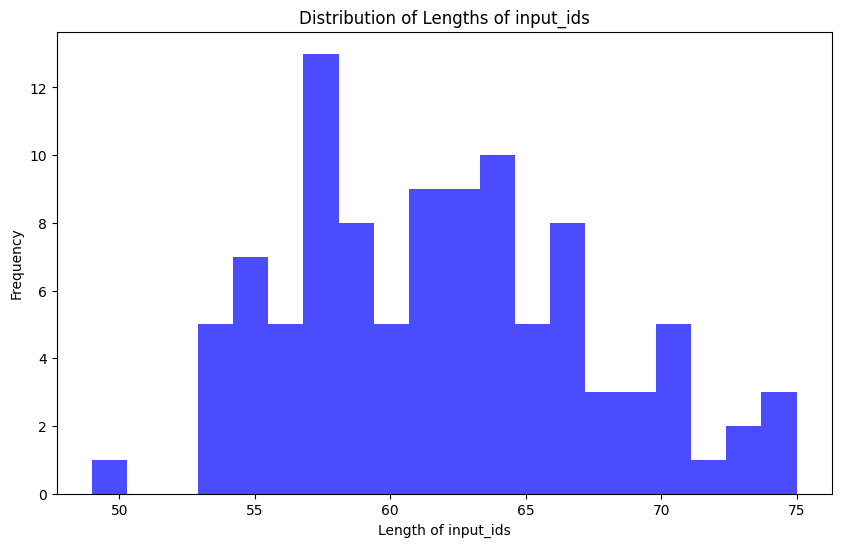

In [14]:
import matplotlib.pyplot as plt

def plot_data_lengths(tokenize_train_dataset, tokenized_test_dataset):
    lengths = [len(x['input_ids']) for x in tokenized_train_dataset]
    lengths += [len(x['input_ids']) for x in tokenized_test_dataset]
    print(len(lengths))

    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(lengths, bins=20, alpha=0.7, color='blue')
    plt.xlabel('Length of input_ids')
    plt.ylabel('Frequency')
    plt.title('Distribution of Lengths of input_ids')
    plt.show()

plot_data_lengths(tokenized_train_dataset, tokenized_test_dataset)

In [15]:
max_length = 80

def generate_and_tokenize_prompt2(prompt):
    result = tokenizer(
        formatting_func(prompt),
        truncation=True,
        max_length=max_length,
        padding="max_length",
    )
    result["labels"] = result["input_ids"].copy()
    return result

In [17]:
tokenized_train_dataset = train.map(generate_and_tokenize_prompt2)
tokenized_test_dataset = test.map(generate_and_tokenize_prompt2)

Map:   0%|          | 0/92 [00:00<?, ? examples/s]

In [18]:
print(tokenized_train_dataset[1]['input_ids'])


[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 774, 22478, 28747, 851, 349, 264, 5498, 477, 2215, 6717, 356, 28705, 28740, 28750, 362, 4117, 28705, 28750, 28734, 28740, 28783, 28723, 13, 774, 26307, 28747, 371, 13, 28705, 345, 6239, 1264, 345, 14964, 6717, 548, 13, 28705, 345, 1408, 1264, 345, 28740, 28750, 362, 4117, 28705, 28750, 28734, 28740, 28783, 28739, 13, 28752, 2]


102


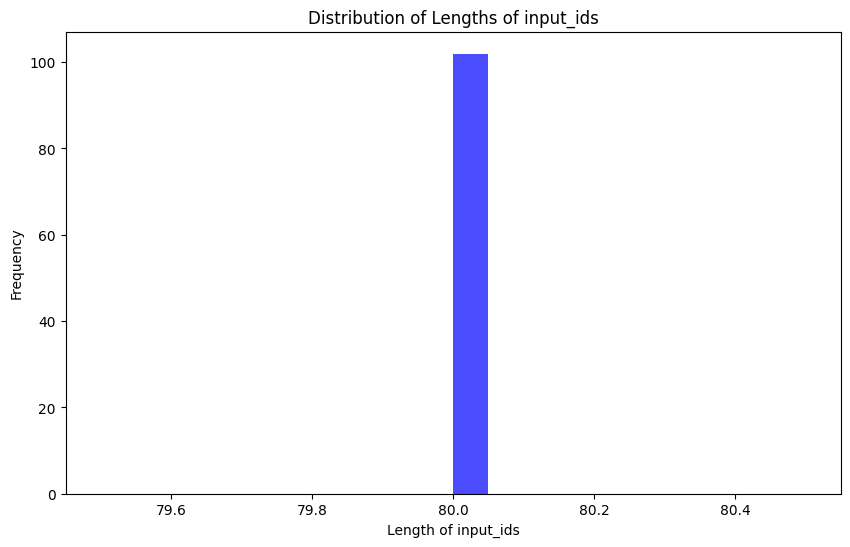

In [19]:
plot_data_lengths(tokenized_train_dataset, tokenized_val_dataset)
